In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_csv('/Users/geraldalanraja/Documents/Projects/Alan Machine Learning/migration_nz.csv')
df.head()

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


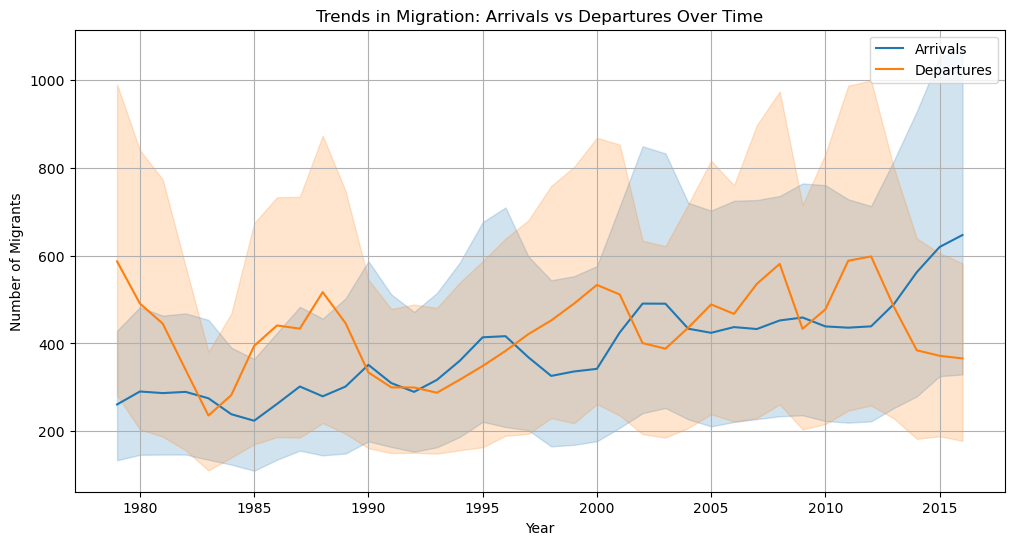

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86526 entries, 0 to 86525
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measure      86526 non-null  object 
 1   Country      86526 non-null  object 
 2   Citizenship  86526 non-null  object 
 3   Year         86526 non-null  int64  
 4   Value        86454 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ MB


In [3]:
# Filter for Arrivals and Departures
arrivals = df[df['Measure'] == 'Arrivals']
departures = df[df['Measure'] == 'Departures']

# Create a combined DataFrame
combined = pd.concat([
    arrivals[['Year', 'Value']].rename(columns={'Value': 'Count'}),
    departures[['Year', 'Value']].rename(columns={'Value': 'Count'})
]).assign(Measure=['Arrivals'] * len(arrivals) + ['Departures'] * len(departures))

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined, x='Year', y='Count', hue='Measure')
plt.title('Trends in Migration: Arrivals vs Departures Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Migrants')
plt.legend()
plt.grid()
plt.show()
df.info()

In [4]:
df.head()

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


In [5]:
df['Measure'].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

In [6]:
df['Citizenship'].unique()

array(['New Zealand Citizen', 'Australian Citizen',
       'Total All Citizenships'], dtype=object)

In [7]:
df['Country'].unique()

array(['Oceania', 'Antarctica', 'American Samoa', 'Australia',
       'Cocos Islands', 'Cook Islands', 'Christmas Island', 'Fiji',
       'Micronesia', 'Guam', 'Kiribati', 'Marshall Islands',
       'Northern Mariana Islands', 'New Caledonia', 'Norfolk Island',
       'Nauru', 'Niue', 'New Zealand', 'French Polynesia',
       'Papua New Guinea', 'Pitcairn Island', 'Palau', 'Solomon Islands',
       'French Southern Territories', 'Tokelau', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Wallis and Futuna', 'Samoa', 'Asia', 'Afghanistan',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Brunei Darussalam',
       'Bhutan', 'China', 'Georgia', 'Hong Kong', 'Indonesia', 'India',
       'Japan', 'Kyrgyzstan', 'Cambodia', 'North Korea', 'South Korea',
       'Kazakhstan', 'Laos', 'Sri Lanka', 'Myanmar', 'Mongolia', 'Macau',
       'Maldives', 'Malaysia', 'Nepal', 'Philippines', 'Pakistan',
       'Singapore', 'Thailand', 'Tajikistan', 'Timor-Leste',
       'Turkmenistan', 'Taiwan', 'Uzbekistan', 'Vietn

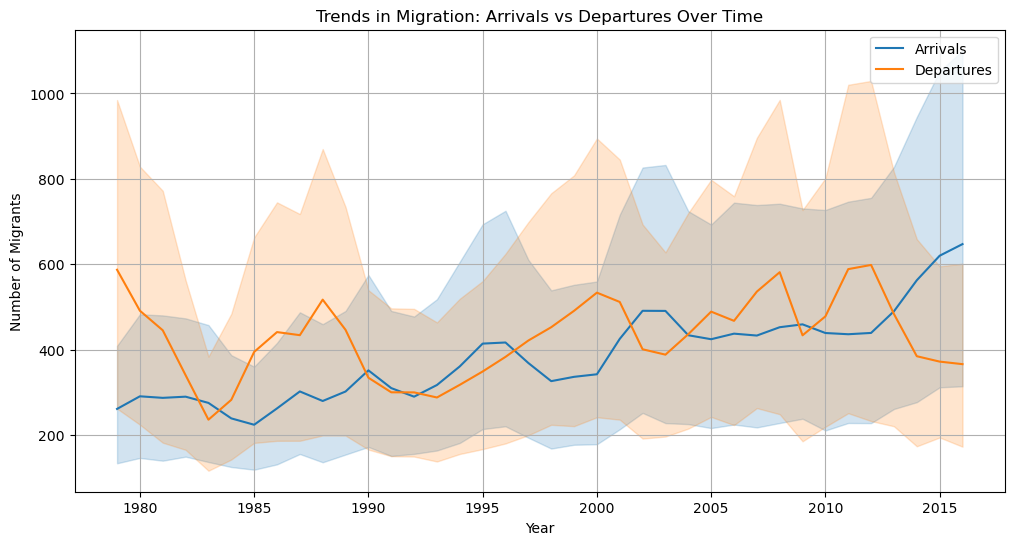

In [8]:
# Filter for Arrivals and Departures
arrivals = df[df['Measure'] == 'Arrivals']
departures = df[df['Measure'] == 'Departures']

# Create a combined DataFrame
combined = pd.concat([
    arrivals[['Year', 'Value']].rename(columns={'Value': 'Count'}),
    departures[['Year', 'Value']].rename(columns={'Value': 'Count'})
]).assign(Measure=['Arrivals'] * len(arrivals) + ['Departures'] * len(departures))

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined, x='Year', y='Count', hue='Measure')
plt.title('Trends in Migration: Arrivals vs Departures Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Migrants')
plt.legend()
plt.grid()
plt.show()


/var/folders/ls/8tz262w50pg0dvllkl7tc7sw0000gn/T/ipykernel_7514/1449531506.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Value', y='Country', palette='viridis')


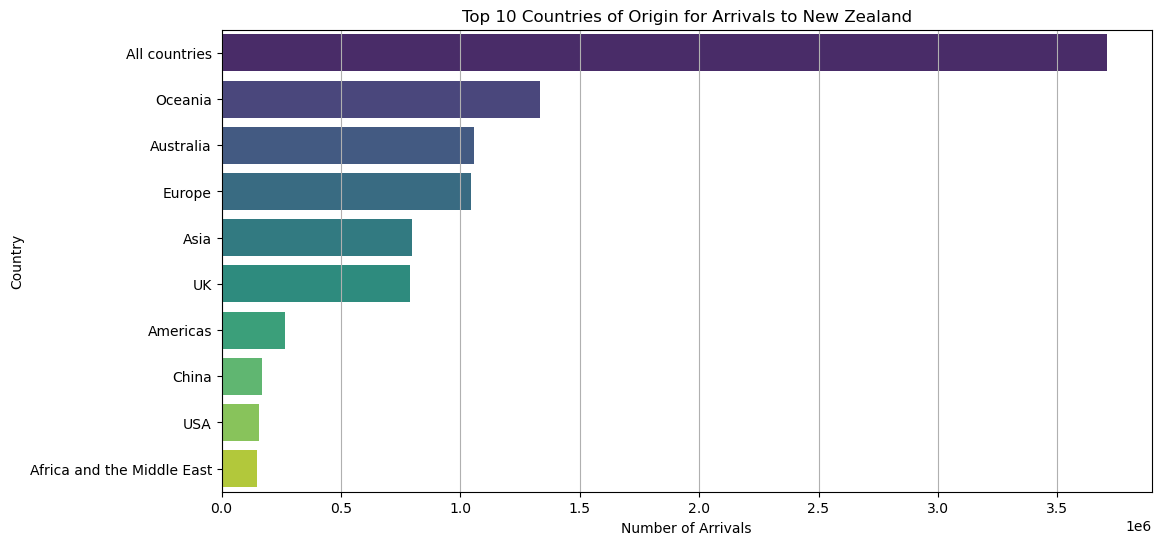

In [9]:
# Filter for Arrivals only
arrivals_by_country = arrivals.groupby('Country')['Value'].sum().reset_index()

# Sort and select top 10 countries
top_countries = arrivals_by_country.sort_values(by='Value', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Value', y='Country', palette='viridis')
plt.title('Top 10 Countries of Origin for Arrivals to New Zealand')
plt.xlabel('Number of Arrivals')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()


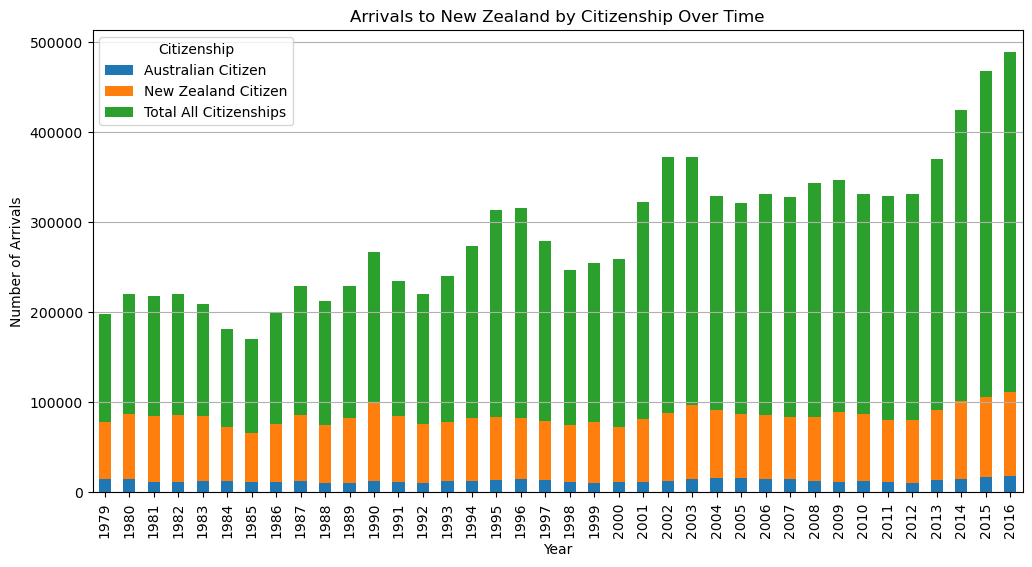

In [10]:
# Create a DataFrame for citizenship arrivals
citizenship_arrivals = arrivals.groupby(['Year', 'Citizenship'])['Value'].sum().unstack()

# Plotting
citizenship_arrivals.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Arrivals to New Zealand by Citizenship Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Arrivals')
plt.legend(title='Citizenship')
plt.grid(axis='y')
plt.show()


In [11]:
# Linear Regression

In [12]:
df['Value'] = df['Value'].fillna(0)  # Filling missing values with 0; adjust as necessary

# Step 3.2: Encode Categorical Variables
categorical_cols = ['Measure', 'Country', 'Citizenship']
df_1 = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the preprocessed DataFrame
print(df_1.head())

   Year    Value  Measure_Departures  Measure_Net  \
0  1979  11817.0               False        False   
1  1979   4436.0               False        False   
2  1979  19965.0               False        False   
3  1979     10.0               False        False   
4  1979      0.0               False        False   

   Country_Africa and the Middle East  Country_Albania  Country_Algeria  \
0                               False            False            False   
1                               False            False            False   
2                               False            False            False   
3                               False            False            False   
4                               False            False            False   

   Country_All countries  Country_American Samoa  Country_Americas  ...  \
0                  False                   False             False  ...   
1                  False                   False             False  ...   
2    

In [13]:
# Define the feature set (X) and target variable (y)
X = df_1.drop(columns=['Value', 'Year'])  # Drop target variable and year for training
y = df_1['Value']


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [17]:
 # Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 7441968.414712156
R-squared: 0.2189104192961694


In [18]:
# CROSS VALIDATION

In [19]:
df['Value'] = df['Value'].fillna(df['Value'].mean())
X = df.drop(columns=['Value', 'Year'])  # Drop target variable and year for training
y = df['Value']


In [20]:
categorical_cols = ['Measure', 'Country', 'Citizenship']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', 'passthrough', X.columns.difference(categorical_cols))  # Keep numeric features
    ]
)


In [21]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [22]:
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')  # 5-fold cross-validation

In [23]:
print(f'Cross-Validated R-squared: {np.mean(cv_scores)}')
print(f'Cross-Validated R-squared Standard Deviation: {np.std(cv_scores)}')

Cross-Validated R-squared: 0.25056869188223385
Cross-Validated R-squared Standard Deviation: 0.046754158466188404


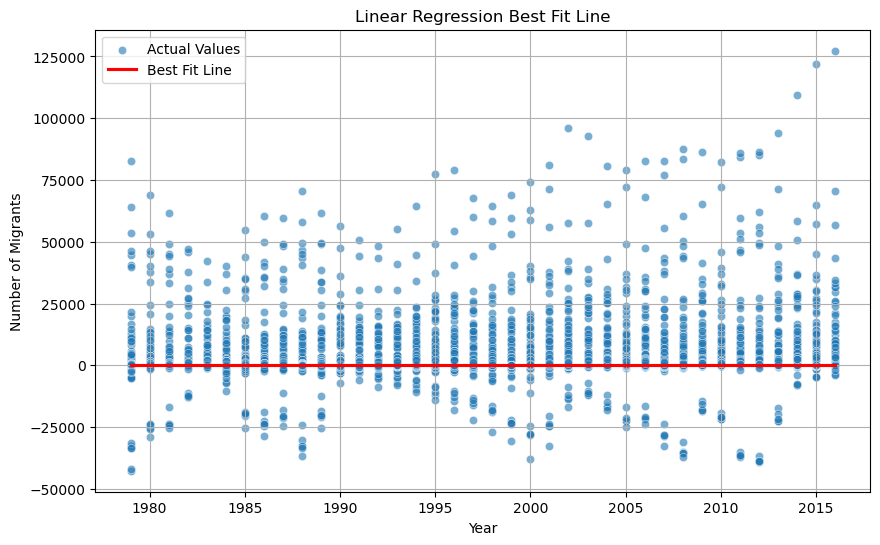

In [24]:
# Assuming you've already trained your model
# and have X and y defined as before
pipeline.fit(X, y)

# Step 1: Create a DataFrame for the predicted values
df_pred = df.copy()
df_pred['Predicted'] = pipeline.predict(X)

# Step 2: Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Value', data=df_pred, label='Actual Values', alpha=0.6)

# Step 3: Plot the best-fit line
sns.regplot(x='Year', y='Predicted', data=df_pred, scatter=False, color='red', label='Best Fit Line')

# Step 4: Customize the plot
plt.title('Linear Regression Best Fit Line')
plt.xlabel('Year')
plt.ylabel('Number of Migrants')
plt.legend()
plt.grid(True)

# Step 5: Show the plot
plt.show()


In [25]:
#LINEAR REGRESSION WITH MULTIPLE VARIABLES

In [26]:
data = df.dropna(subset=['Value'])
X = data[['Measure', 'Country', 'Citizenship', 'Year']]
y = data['Value']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Measure', 'Country', 'Citizenship'])
    ],
    remainder='passthrough'
)

In [29]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [30]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Measure', 'Country',
                                                   'Citizenship'])])),
                ('regressor', LinearRegression())])

In [31]:
 # Calculate performance metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 7436743.905959806
R-squared: 0.21945877009845027


In [32]:
#LOGISTIC REGRESSION

In [33]:
modified_df = df

In [34]:
modified_df.head()

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


In [35]:
modified_df['Migrated'] = np.where(modified_df['Value'] > 0, 1, 0)


In [36]:
X = modified_df.drop(columns=['Migrated', 'Value'])  # Drop target variable and Value
y = modified_df['Migrated']


In [37]:
categorical_cols = ['Measure', 'Country', 'Citizenship']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [40]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[8360 1512]
 [1646 5788]]


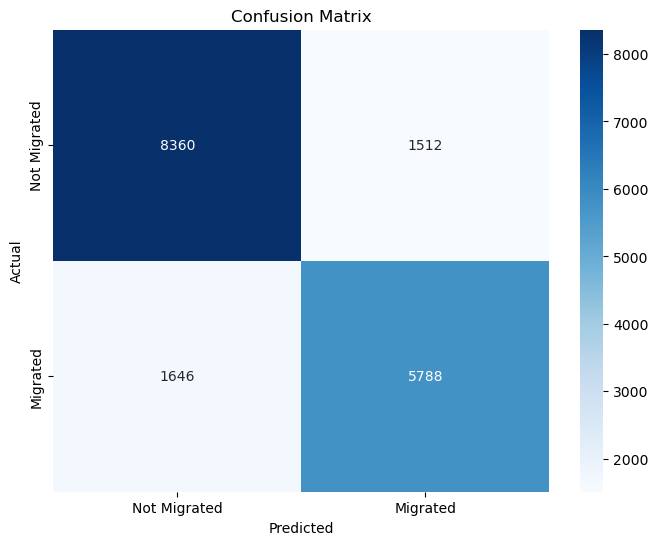

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Migrated', 'Migrated'],
            yticklabels=['Not Migrated', 'Migrated'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [42]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [43]:
print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_rep)

Accuracy: 0.817519935282561
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      9872
           1       0.79      0.78      0.79      7434

    accuracy                           0.82     17306
   macro avg       0.81      0.81      0.81     17306
weighted avg       0.82      0.82      0.82     17306



In [44]:
#SVM & PCA

In [45]:
#Error because we have categorical data
categorical_cols = ['Measure', 'Country', 'Citizenship']
mod_data = pd.get_dummies(modified_df, columns=categorical_cols, drop_first=True)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(mod_data)

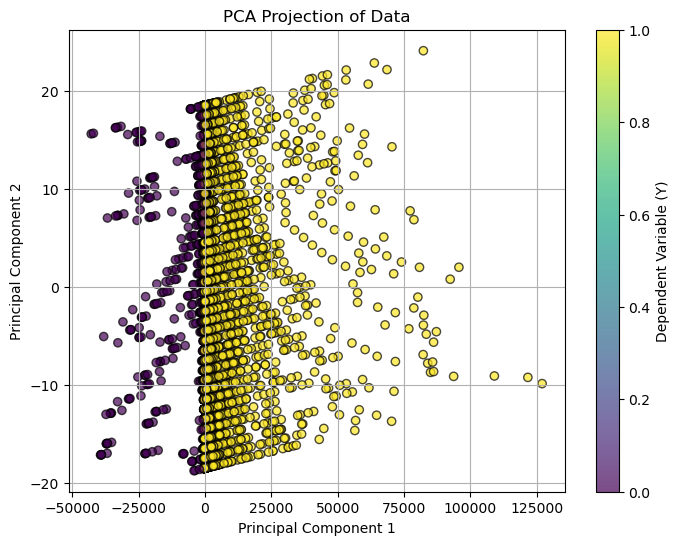

In [46]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA Projection of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Dependent Variable (Y)')
plt.grid()
plt.show()

In [47]:
model = SVC(kernel='linear')  # You can change the kernel to 'rbf', 'poly', etc.
model.fit(X_train, y_train)


SVC(kernel='linear')

In [48]:
y_pred = model.predict(X_test)


In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[8221 1651]
 [1649 5785]]


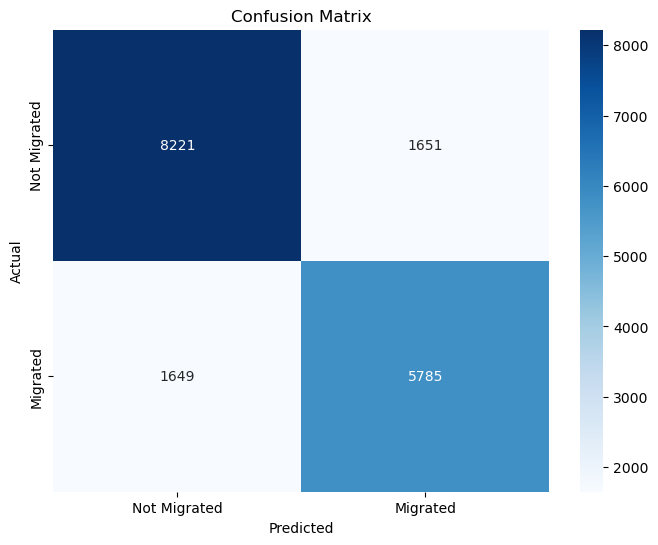

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Migrated', 'Migrated'],
            yticklabels=['Not Migrated', 'Migrated'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [51]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_rep)

Accuracy: 0.8093146885473246
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      9872
           1       0.78      0.78      0.78      7434

    accuracy                           0.81     17306
   macro avg       0.81      0.81      0.81     17306
weighted avg       0.81      0.81      0.81     17306



In [52]:
#KNN

In [53]:
k_values = range(1, 21)  # Testing k from 1 to 20
mean_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    mean_scores.append(scores.mean())

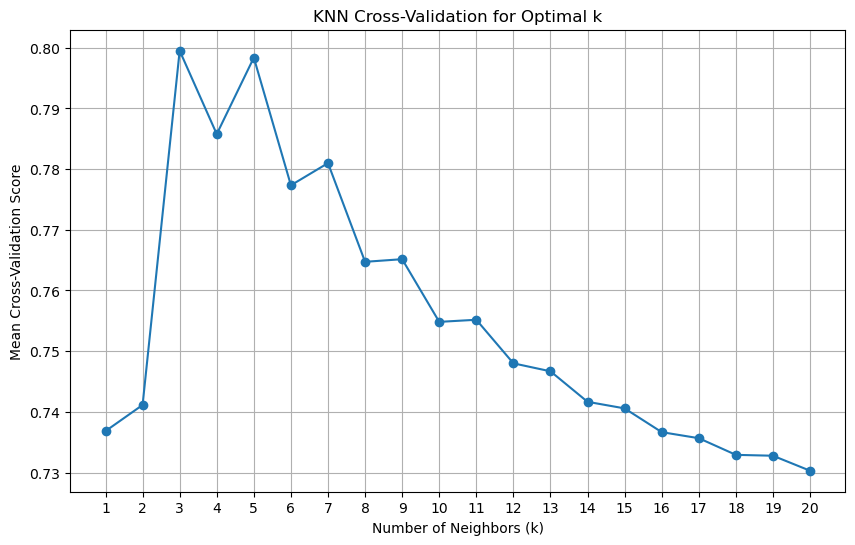

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.title('KNN Cross-Validation for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Score')
plt.xticks(k_values)
plt.grid()
plt.show()

In [55]:
optimal_k = k_values[np.argmax(mean_scores)]
print(f'Optimal k value: {optimal_k}')

Optimal k value: 3


In [56]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
y_pred = model.predict(X_test)

In [58]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[8242 1630]
 [1656 5778]]


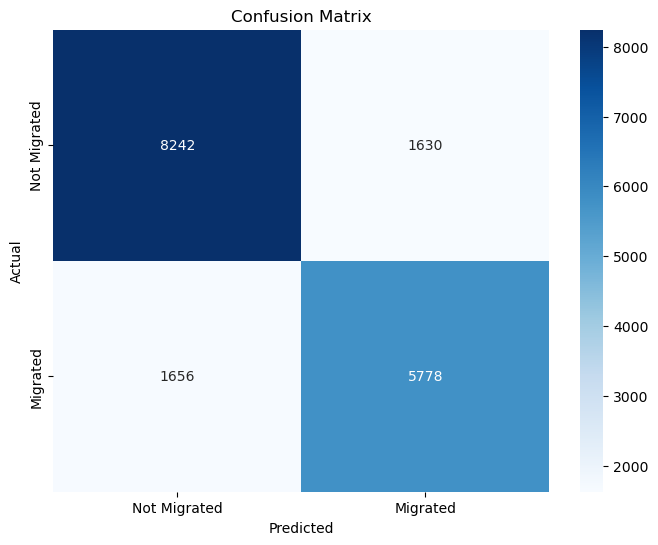

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Migrated', 'Migrated'],
            yticklabels=['Not Migrated', 'Migrated'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [60]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_rep)

Accuracy: 0.8101236565353057
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      9872
           1       0.78      0.78      0.78      7434

    accuracy                           0.81     17306
   macro avg       0.81      0.81      0.81     17306
weighted avg       0.81      0.81      0.81     17306



In [61]:
# NAIVE BAYES CLASSIFIER

In [62]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [63]:
y_pred = model.predict(X_test)

In [64]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[8052 1820]
 [2014 5420]]


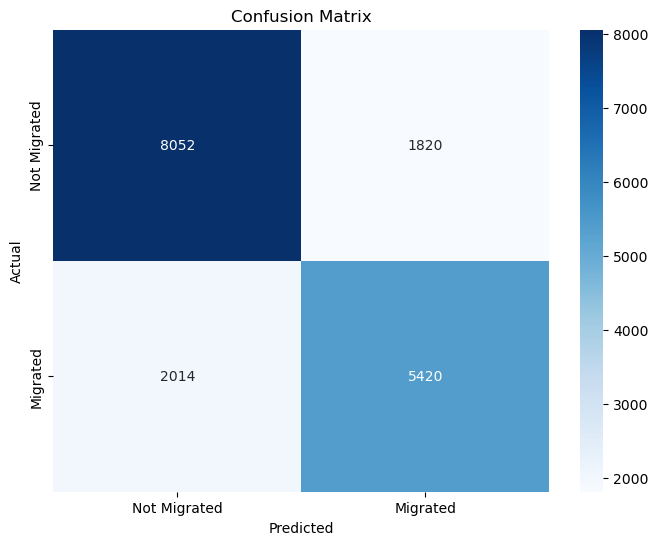

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Migrated', 'Migrated'],
            yticklabels=['Not Migrated', 'Migrated'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_rep)

Accuracy: 0.778458338148619
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      9872
           1       0.75      0.73      0.74      7434

    accuracy                           0.78     17306
   macro avg       0.77      0.77      0.77     17306
weighted avg       0.78      0.78      0.78     17306



In [67]:
#Hierarchical clustering and Cluster Evaluation using silhouette score

In [68]:
linked = linkage(X, method='ward')

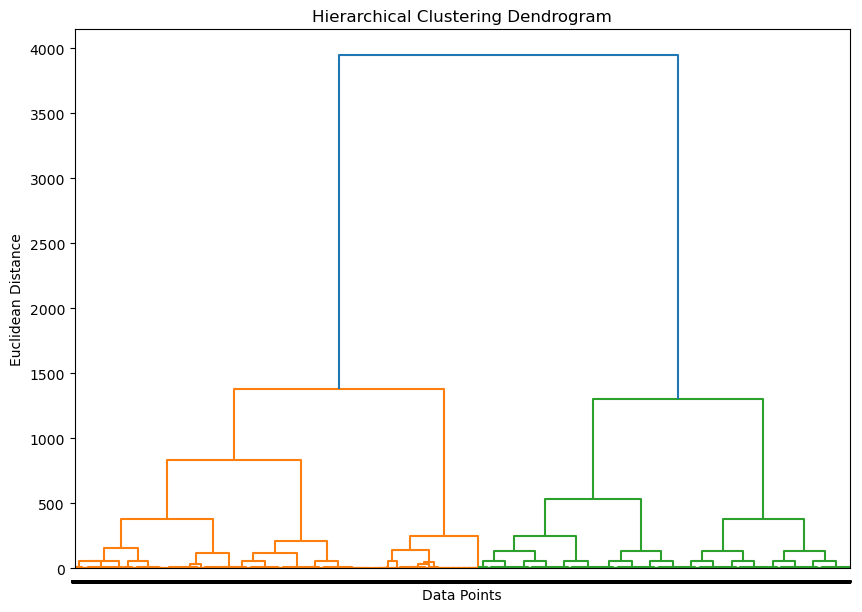

In [69]:
plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top', 
           labels=y.values, 
           distance_sort='descending', 
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [70]:
agglo_clustering = AgglomerativeClustering(n_clusters=2)  # Change n_clusters as needed
clusters = agglo_clustering.fit_predict(X)

In [71]:
df['cluster'] = clusters

In [72]:
silhouette_avg = silhouette_score(X, clusters)
print(f'Silhouette Score for 2 clusters: {silhouette_avg}')

Silhouette Score for 2 clusters: 0.6013562468096774


In [ ]:
for n in range(2, 11):  # Change range as needed
    agglo_clustering = AgglomerativeClustering(n_clusters=n)
    clusters = agglo_clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    print(f'Silhouette Score for {n} clusters: {silhouette_avg}')

Silhouette Score for 2 clusters: 0.6013562468096774
Silhouette Score for 3 clusters: 0.49591222432520043
Silhouette Score for 4 clusters: 0.4460028081288771


In [ ]:
#Decision Tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth as needed
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
plt.figure(figsize=(10, 10))  # Adjust size for better visibility
plot_tree(clf, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree")
plt.show()

In [ ]:
#Random Forest

In [ ]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

In [ ]:
regressor.fit(X, y)

In [ ]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = regressor.predict(X)

# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 25))  # Adjust the figure size
plot_tree(tree_to_plot, feature_names=X_train.columns.tolist(), filled=True, rounded=True, fontsize=10, max_depth=3)
plt.title("Decision Tree from Random Forest")
plt.show()


In [ ]:
#ANN

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')